# Data preparation

In [ ]:
# The Titanic disaster dataset contains the following variables:

# Survived - Survival of the passenger (0 = No; 1 = Yes)
# Pclass - The class of the ticket that was purchased (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - The name of the passenger (object / string)
# Sex - The sex of the passenger (male/female)
# Age - The age of the passenger (float)
# SibSp - The number of Siblings/Spouses Aboard (int)
# Parch - The number of Parents/Children Aboard (int)
# Ticket - Ticket number (object / string)
# Fare - The fare the passenger paid (float)
# Cabin - Cabin (object / string)
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# The main objective is to develop, visualize and evaluate a couple of classification models
# using Decision Tree Classifier. You should take care of the model parameters in order to get the model(s)
# that perform(s) better than those with random or default parameters. Briefly explain which model
# has performed best and which features have been the most significant in each model.

In [6]:
#@title Data load
# Load a csv file
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/sdimitrijevic/ai-ml/main/datasets/titanic.csv'
df = pd.read_csv(url)

# from a file
# df = pd.read_csv("datasets\titanic.csv")

df.shape

(891, 12)

In [4]:
#@title Checking data
# First 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Since categorical variables cannot be used in sklearn.tree DecisionTreeClassifier
# a simple mapper is used here to transform female/male into 1/0.

scale_mapper = {"female":1, "male":0}
df['Sex']= df['Sex'].replace(scale_mapper)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
# Removing non-numerical variables and PassangerId, since they are not used in decision trees.
non_num_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

for i in non_num_columns:
    df = df.drop([i],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
# Checking status (class) balance
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
#@title Raplacing missing values

# When categorical variables have a small number of missing values, the missing values
## are replaced by the 'majority class' (the dominant value).

# Numeric variables have a small number of missing values: 
## (Alternative 1) The missing values can be replaced by the average value of the variable
## on a subset of instances that are the closest (the most similar)
## to the instance(s) with the missing value.
## If the variable is normaly distributed (e.g., shapiro.test()) -> the mean is used;
## otherwise, the median is used.
## In the simplest case, the entire range of instances is used.

## (Alternative 2) Regression can be used to PREDICT the missing values, 
## and replace the missing values with the predicted ones.

## (Alternative 3) The missing values can be replaced with non-NaN values from a subset of SIMILAR  
## (similar in terms of having (nearly) the same values of other relevant features). 
## The replacements typically go one by one, so the number of NaNs should be very small.

# Variables with many missing values and/or missing values that are difficult to replace
## Such cases require a more sophisticated imputation, i.e., prediction of good substitutes 
## for the missing values.
## The other option is to create some new variables ("proxies") and do some feature engineering.

# Checking normality
from scipy.stats import shapiro

# Columns with missing values (direct converting to int may result in errors)
columns = ['Age']

# Dataframe without NaN
df_temp = df.dropna()

# Replacing missing values with the mean or meadian value of the variable depending on the normality test
for i in columns:    
    print(i)
    # normality test
    stat, p = shapiro(df_temp[i])
    print('\n(W)= %e,\n p = %e' % ( stat, p ))

    # Replacing NaN    
    if p > 0.05:
        df[i].fillna(df[i].mean(), inplace=True)
        print('\nSample looks Gaussian\n')
    else:
        df[i].fillna(df[i].median(), inplace=True)
        print('\nSample does not look Gaussian\n')

Age

(W)= 9.814583e-01,
 p = 7.340330e-08

Sample does not look Gaussian



In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#@title Splitting data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Spliting x axis and y axis
y = df['Survived']
x = df.drop(['Survived'],axis=1)

# Splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_test.shape,y_test.shape

((179, 6), (179,))

In [ ]:
# Oversampling is used to balance the unbalanced dataset.

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Oversampling
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_train)}")


Training target statistics: Counter({0: 439, 1: 439})


In [ ]:
# Concating x_train and x_train for a visualization
df_train_balanced = pd.concat([x_train, y_train], axis=1)

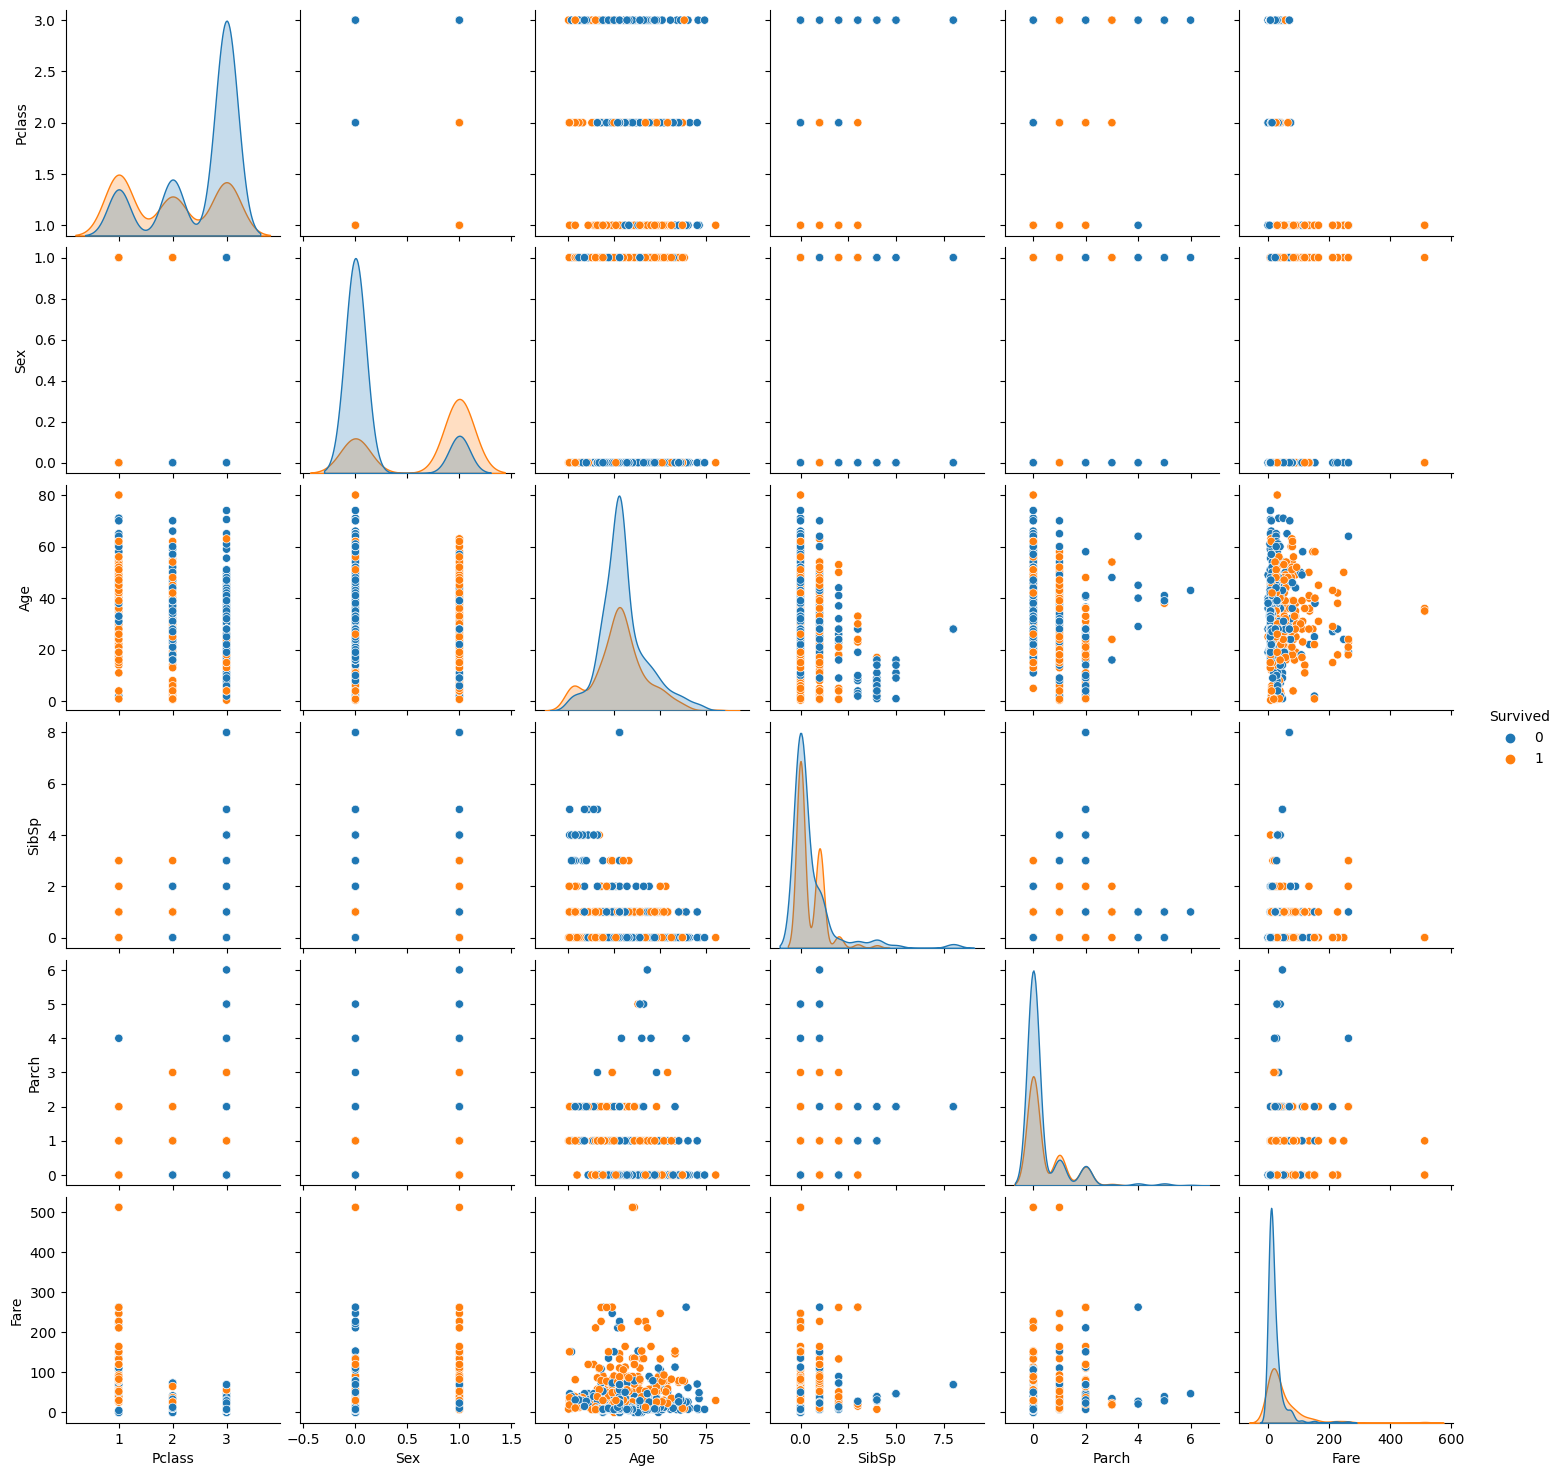

In [ ]:
#@title Data visualization
import seaborn as sns
from matplotlib import pyplot as plt

# Investigating separation between classes
sns.pairplot(data=df, hue='Survived')
plt.show()


In [ ]:
# Based on the pair-plot, the following variables show a considerable separation
# between classes: Sex, Age, Fare.

# Decision Tree Classifier



In [ ]:
#@title Decision Tree 1 - Default parameters

# The default values for the parameters controlling the size of the trees
# (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees
# which can potentially be very large on some data sets. 

# This is the step that preceedes cost complexity pruning

# Initializing Decision Tree with default parameters
dtc1 = DecisionTreeClassifier(random_state = 0)

# Fitting the model with default parameters
dtc1 = dtc1.fit(x_train,y_train)

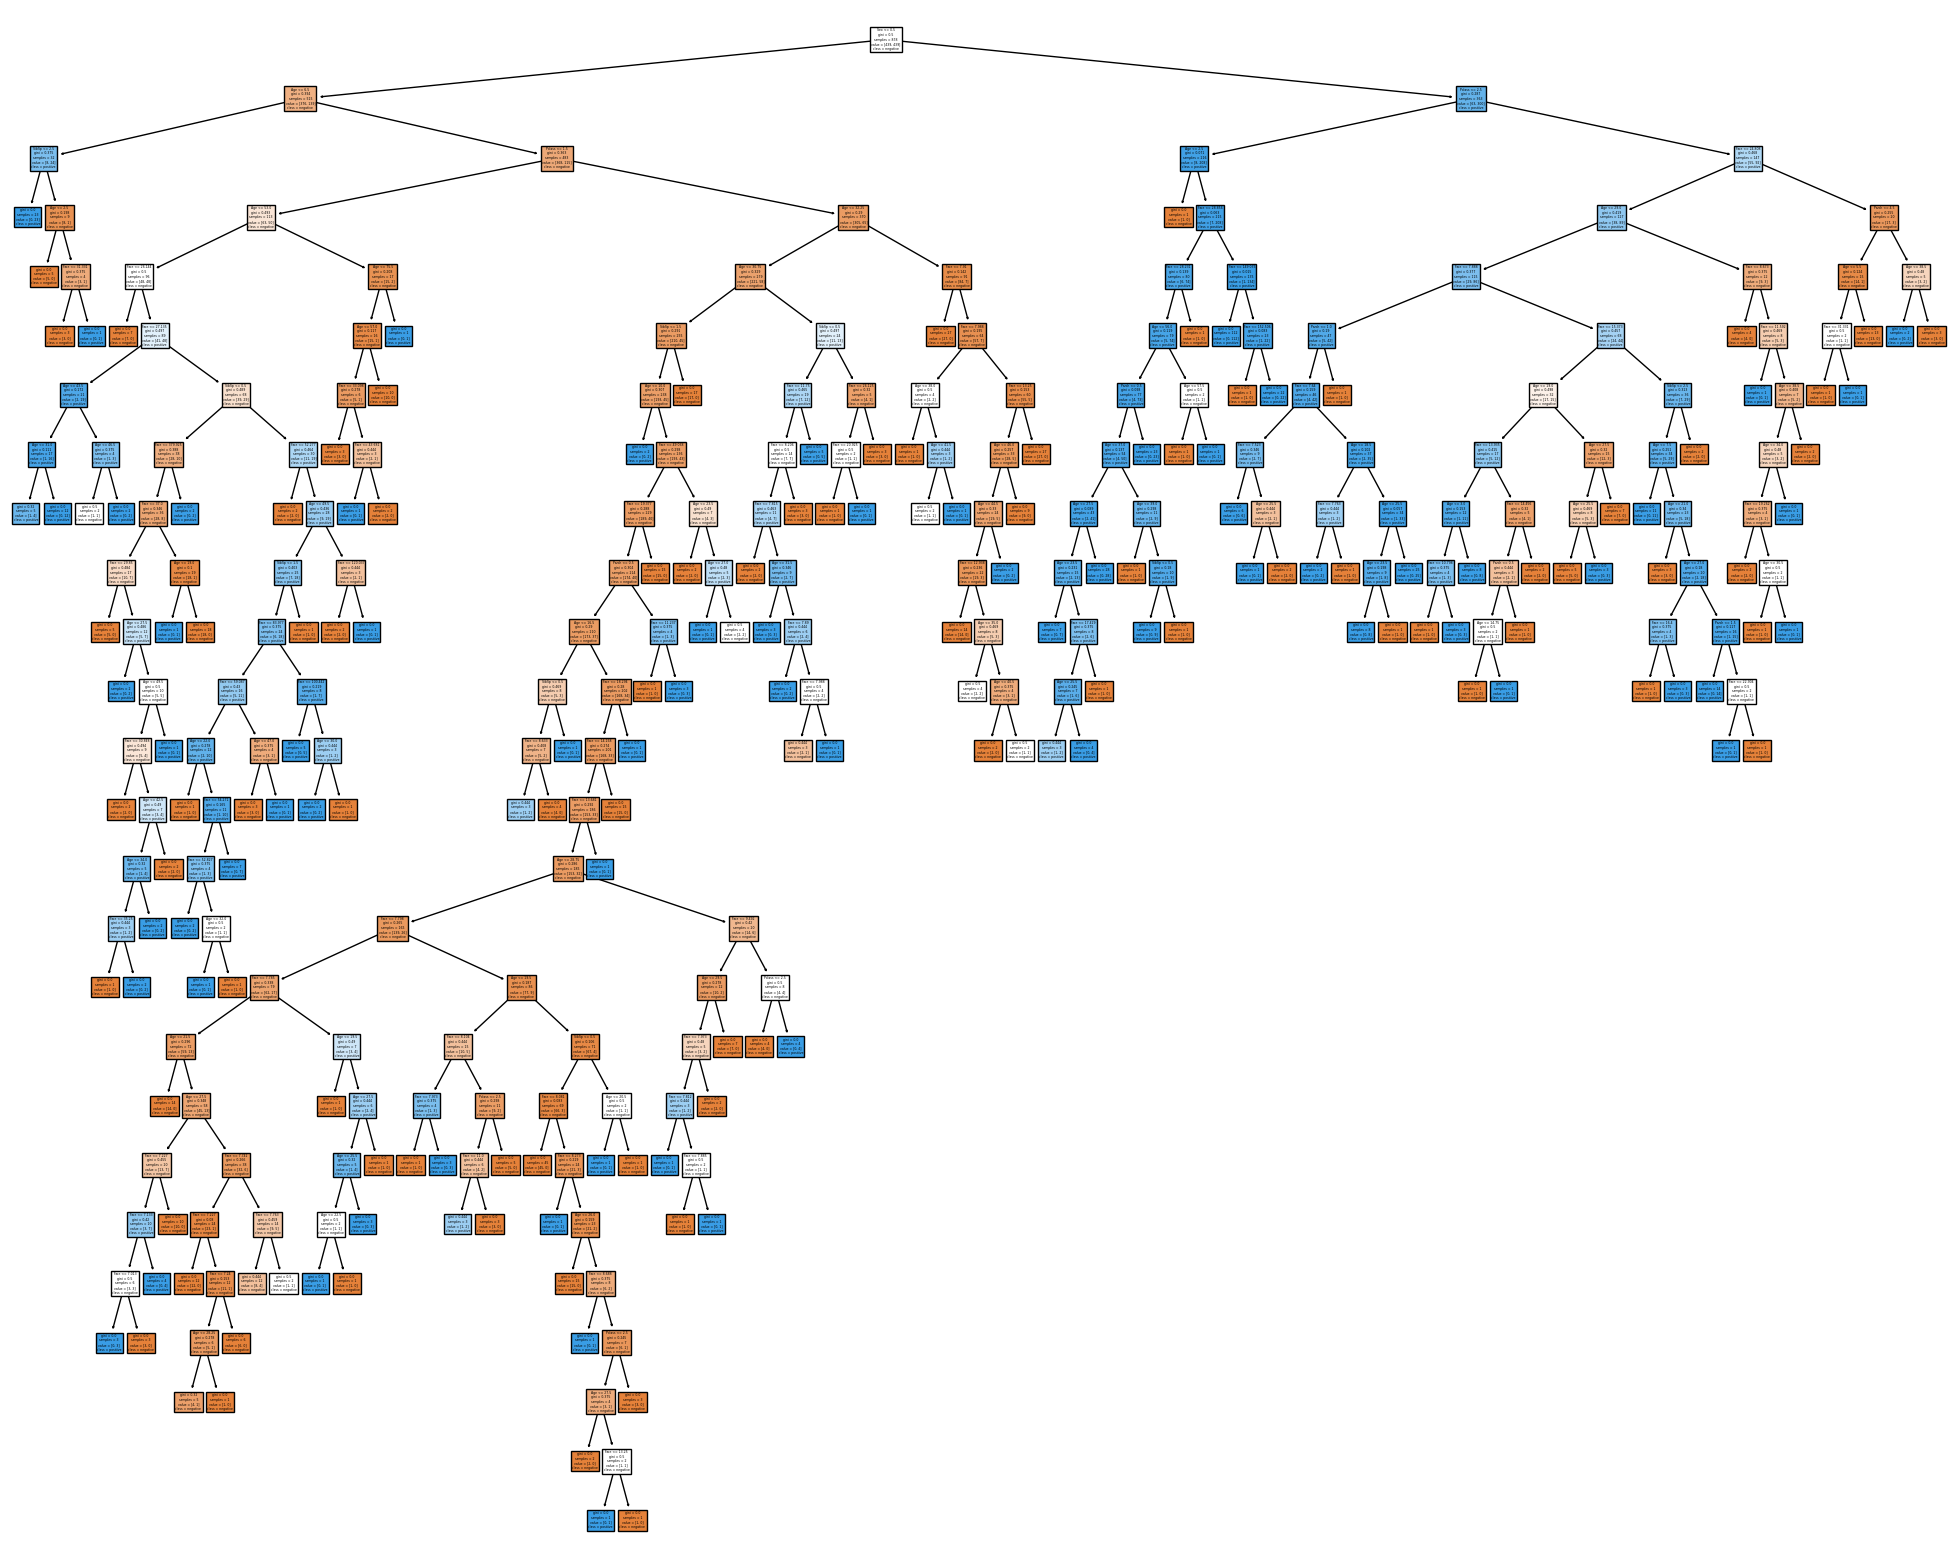

In [ ]:
#@title Decision Tree 1 Visualization
from matplotlib import pyplot as plt
from sklearn import tree

# Plotting a tree
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc1, 
                   feature_names= x_train.columns, 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

In [ ]:
# Getting feature importances
dtc1_imp_features = dtc1.feature_importances_
print(dtc1_imp_features)

[0.08876144 0.31620772 0.24255971 0.0593507  0.01542749 0.27769294]


<BarContainer object of 6 artists>

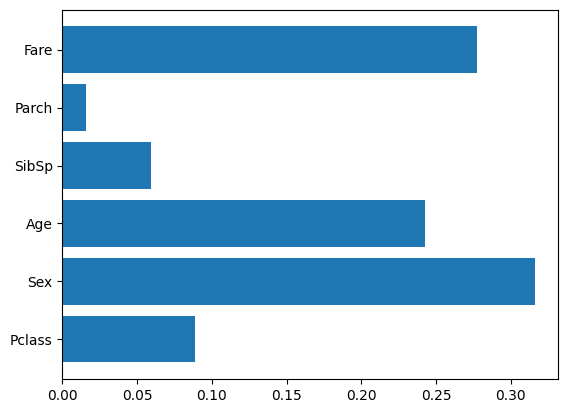

In [ ]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(dtc1.feature_names_in_, dtc1.feature_importances_)

In [ ]:
#@title Decision Treee 1 Evaluation
from sklearn.metrics import confusion_matrix

# Predicting a class / outcome using test data
y_pred1 = dtc1.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred1)

array([[92, 18],
       [22, 47]])

In [ ]:
# Accuracy
dtc1_accuracy = metrics.accuracy_score(y_test, y_pred1)

# Precision
dtc1_precision = metrics.precision_score(y_test, y_pred1)

# Recall
dtc1_recall = metrics.recall_score(y_test, y_pred1)

# F1
dtc1_f1 = metrics.f1_score(y_test, y_pred1)

print("DTC1 accuracy: ", dtc1_accuracy,
      "\nDTC1 precision: ", dtc1_precision,
      "\nDTC1 recall: ", dtc1_recall,
      "\nDTC1 F1: ", dtc1_f1)

DTC1 accuracy:  0.776536312849162 
DTC1 precision:  0.7230769230769231 
DTC1 recall:  0.6811594202898551 
DTC1 F1:  0.7014925373134329


In [ ]:
#@title Decision Tree 2 - Cost complexity pruning
# The pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 
# Greater values of ccp_alpha increase the number of nodes pruned.

# Cost complexity pruning is about finding the right parameter for ccp_alpha. 
# It gets the ccp_alpha values for a tree and checks the impurity with the pruned trees.

path = dtc1.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 7.59301443e-05 1.08471635e-04 1.42369021e-04
 3.21586493e-04 3.79650721e-04 4.19529999e-04 4.27107062e-04
 4.33886539e-04 4.55580866e-04 6.07441154e-04 6.50829808e-04
 6.74934616e-04 6.90274039e-04 7.11845103e-04 7.59301443e-04
 7.59301443e-04 7.97140385e-04 8.13537260e-04 9.11161731e-04
 9.11161731e-04 9.11161731e-04 9.35567849e-04 9.96583144e-04
 1.01240192e-03 1.02505695e-03 1.04132769e-03 1.04403948e-03
 1.05412588e-03 1.06302202e-03 1.07738718e-03 1.10358098e-03
 1.10443846e-03 1.10965884e-03 1.13051548e-03 1.13895216e-03
 1.17149365e-03 1.20539104e-03 1.24824160e-03 1.33658468e-03
 1.36163191e-03 1.37623386e-03 1.40678553e-03 1.70842825e-03
 1.70842825e-03 1.84130600e-03 1.85856764e-03 1.88429586e-03
 1.94890496e-03 1.95791301e-03 2.05169577e-03 2.12212000e-03
 2.15668484e-03 2.15801463e-03 2.66088532e-03 2.73348519e-03
 2.80718210e-03 3.13025742e-03 4.12925990e-03 4.29048653e-03
 4.67242114e-03 5.23295039e-03 5.82348030e-03 6.13431603e-03
 1.16426221e-02 1.194042

In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(x_train, y_train)
    clfs.append(clf)

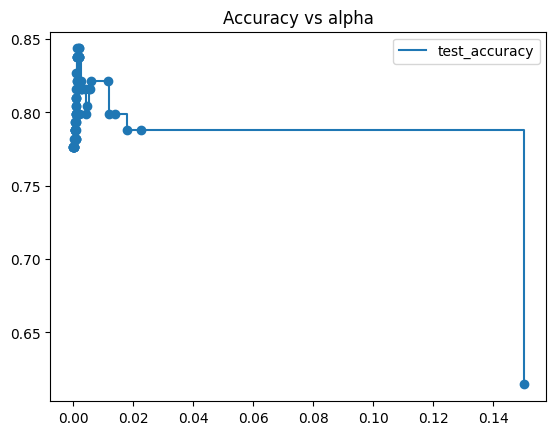

In [ ]:
# Calculating and ploting accuracy vs alpha
from sklearn.metrics import accuracy_score

test_acc = []
for c in clfs:
    y_test_pred = c.predict(x_test)
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
# Reading alpha for max accuracy
max_y = max(test_acc)  # Find the maximum y value
max_x = ccp_alphas[test_acc.index(max_y)]  # Find the x value corresponding to the maximum y value
print(max_x, max_y)

0.0013762338648443434 0.8435754189944135


In [ ]:
# Initializing Decision Tree
dtc2 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0013762338648443434)

# Fitting the model
dtc2 = dtc2.fit(x_train,y_train)

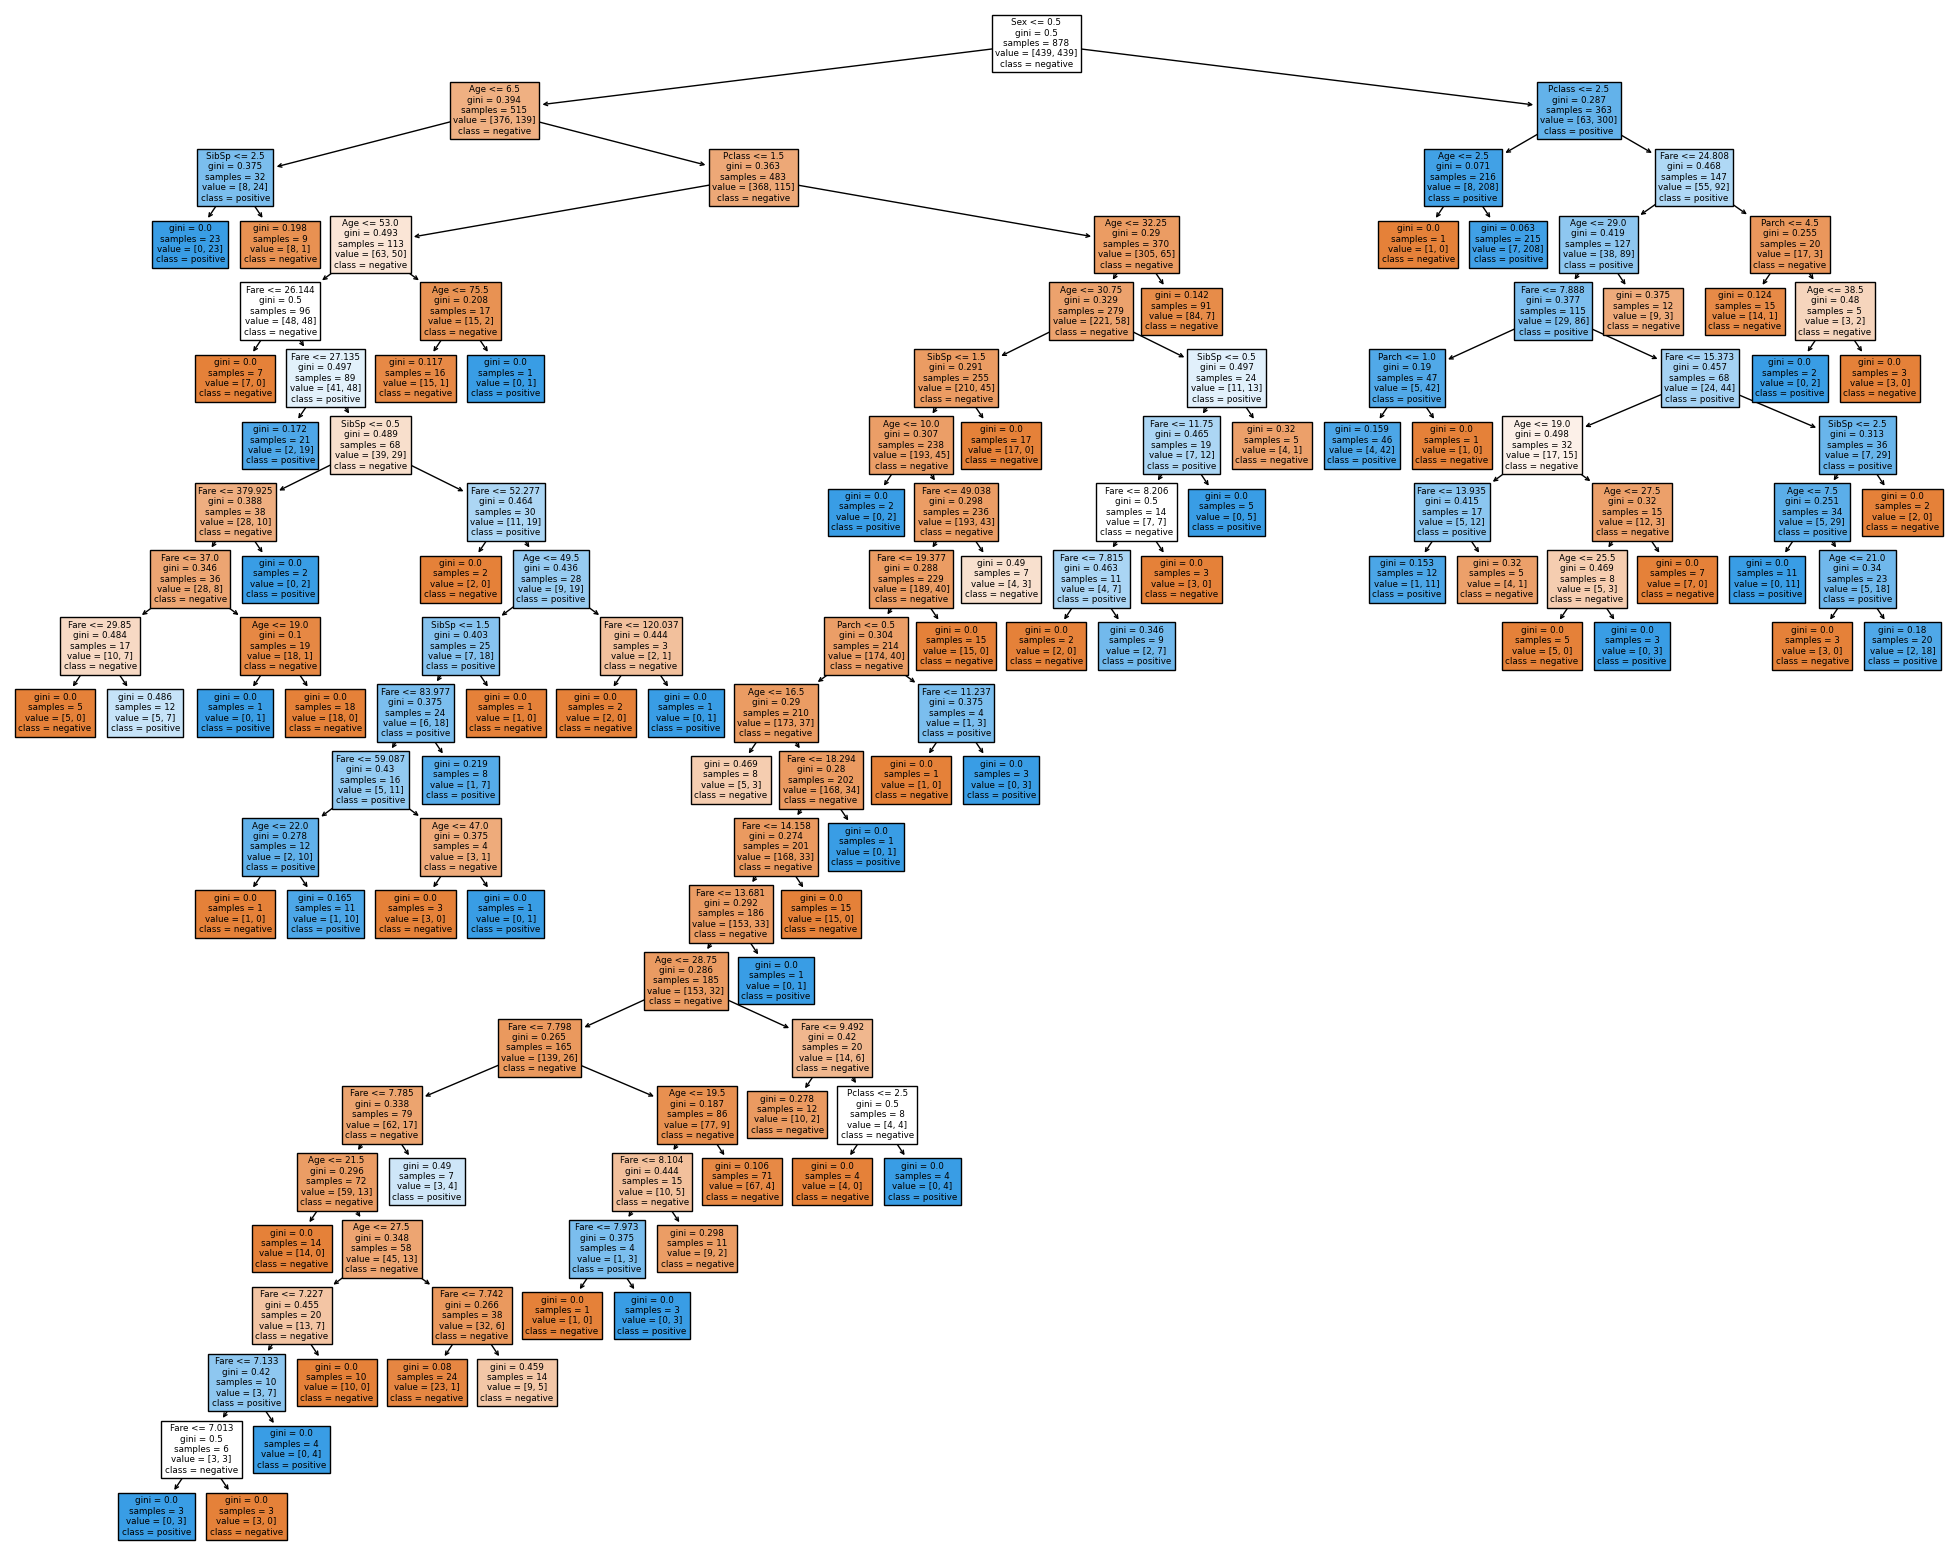

In [ ]:
#@title Decision Tree 2 Visualization

# Plotting a tree
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc2, 
                   feature_names= x_train.columns, 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

In [ ]:
# Getting feature importances
dtc2_imp_features = dtc2.feature_importances_
print(dtc2_imp_features)

[0.10732618 0.39100689 0.19865455 0.06300579 0.01497017 0.22503642]


<BarContainer object of 6 artists>

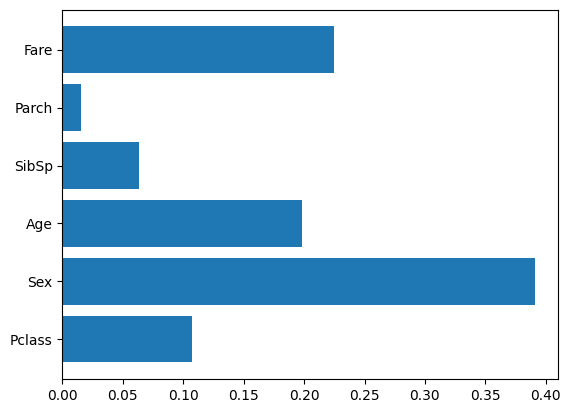

In [ ]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(dtc2.feature_names_in_, dtc2.feature_importances_)

In [ ]:
#@title Decision Tree 2 Evaluation

# Predicting the output/class
y_pred2 = dtc2.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred2)

array([[98, 12],
       [16, 53]])

In [ ]:
# Accuracy
dtc2_accuracy = metrics.accuracy_score(y_test, y_pred2)

# Precision
dtc2_precision = metrics.precision_score(y_test, y_pred2)

# Recall
dtc2_recall = metrics.recall_score(y_test, y_pred2)

# F1
dtc2_f1 = metrics.f1_score(y_test, y_pred2)

print("DTC2 accuracy: ", dtc2_accuracy,
      "\nDTC2 precision: ", dtc2_precision,
      "\nDTC2 recall: ", dtc2_recall,
      "\nDTC2 F1: ", dtc2_f1)

DTC2 accuracy:  0.8435754189944135 
DTC2 precision:  0.8153846153846154 
DTC2 recall:  0.7681159420289855 
DTC2 F1:  0.7910447761194029


In [ ]:
#@title Decision Tree 3 - Huperparameters tuning
from sklearn.model_selection import GridSearchCV

# A dictionary of multiple possible values for parameters (hyperparameter space)
# Parameters for tuning
params = {'max_depth': [6,8,10,12,14],
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3,4,5,6],
         'max_leaf_nodes': [4,6,8,10]}

# Initializing Decision Tree with default parameters
clf = DecisionTreeClassifier()

# The GridSearchCV is the process of performing hyperparameter tuning in order to
  ## determine the optimal values for a given model. 
# GridSearchCV tries all the combinations of the values passed in the dictionary
  ## and evaluates the model for each combination using the Cross-Validation method
# Cross-validation is a statistical method used to estimate the performance (e.g., accuracy)
  ## of machine learning models. It is used to protect against overfitting in a predictive model, 
  ## particularly in a case where the amount of data may be limited. The cross-validation algorithm,
  ## makes a fixed number of folds (or partitions) of the data, runs the analysis on each fold,
  ## and then averages the overall error estimate.
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv = gcv.fit(x_train,y_train)

In [ ]:
#@title Decision Tree 3 Evaluation
from sklearn.metrics import confusion_matrix

# Gettting the best estimator
dtc3 = gcv.best_estimator_

# Fitting the model
dtc3 = dtc3.fit(x_train,y_train)

# Predicting a class / outcome using test data
y_pred3 = dtc3.predict(x_test)

# Calculating confusion matrix
confusion_matrix(y_test, y_pred3)

array([[91, 19],
       [12, 57]])

In [ ]:
# Accuracy
dtc3_accuracy = metrics.accuracy_score(y_test, y_pred3)

# Precision
dtc3_precision = metrics.precision_score(y_test, y_pred3)

# Recall
dtc3_recall = metrics.recall_score(y_test, y_pred3)

# F1
dtc3_f1 = metrics.f1_score(y_test, y_pred3)

print("DTC3 accuracy: ", dtc3_accuracy,
      "\nDTC3 precision: ", dtc3_precision,
      "\nDTC3 recall: ", dtc3_recall,
      "\nDTC3 F1: ", dtc3_f1)

DTC3 accuracy:  0.8268156424581006 
DTC3 precision:  0.75 
DTC3 recall:  0.8260869565217391 
DTC3 F1:  0.786206896551724


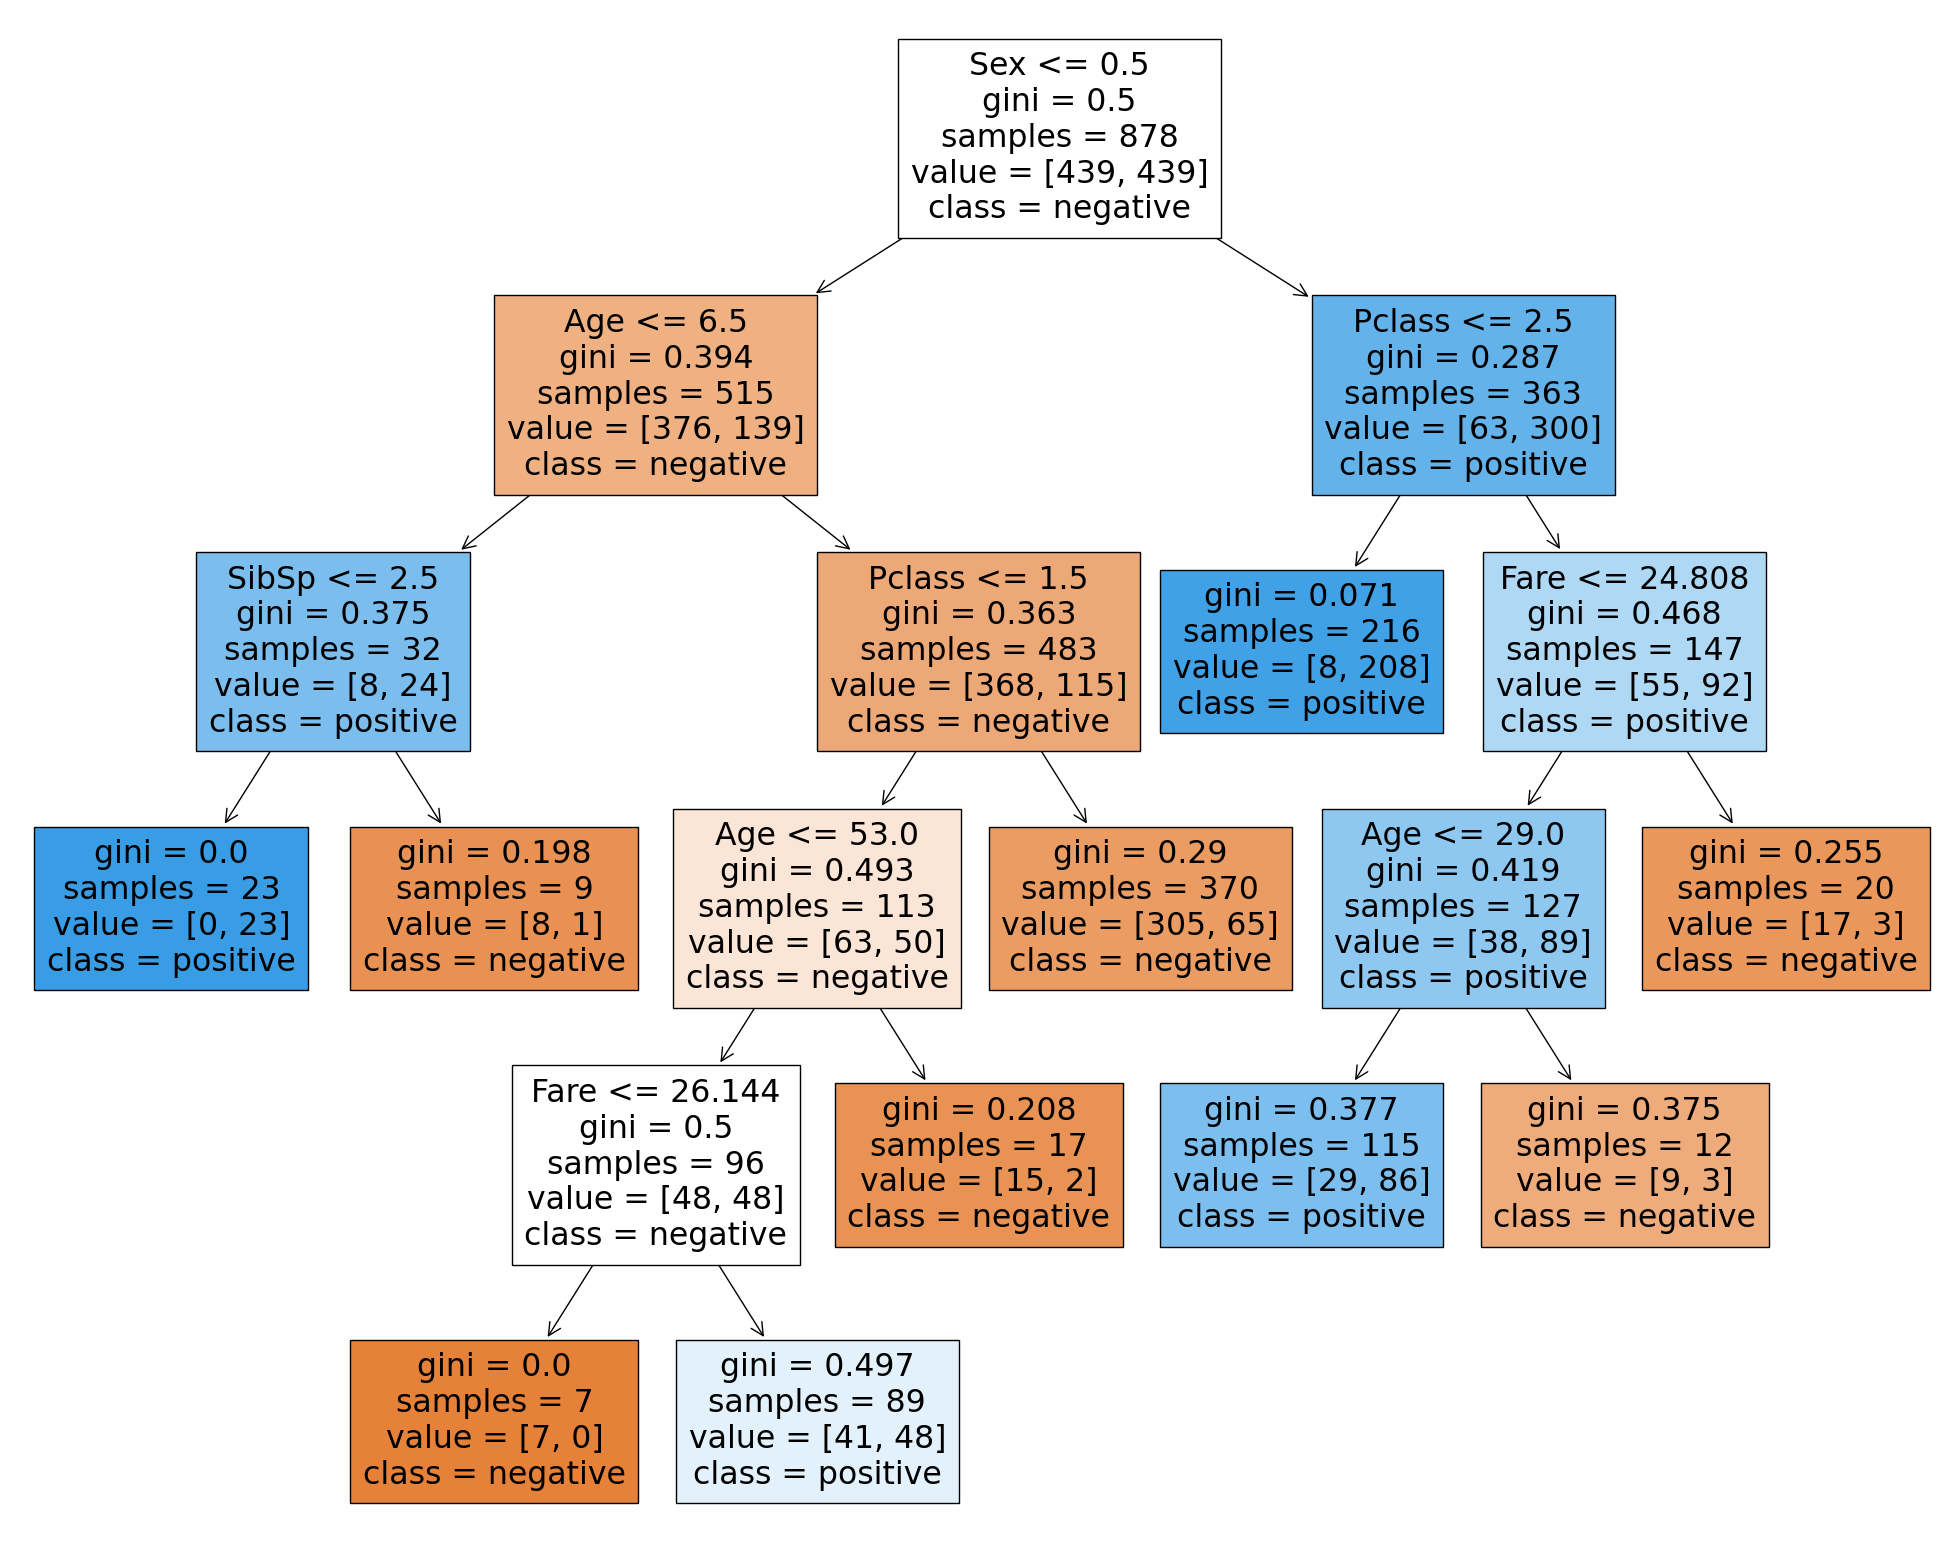

In [ ]:
#@title Decision Tree 3 Visualization

# Plotting a tree
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc3, 
                   feature_names= x_train.columns, 
                   class_names= ['negative', 'positive'],                 
                   filled=True)

In [ ]:
# Getting feature importances
dtc3_imp_features = dtc3.feature_importances_
print(dtc3_imp_features)

[0.15054372 0.61657599 0.11844184 0.04778423 0.         0.06665421]


<BarContainer object of 6 artists>

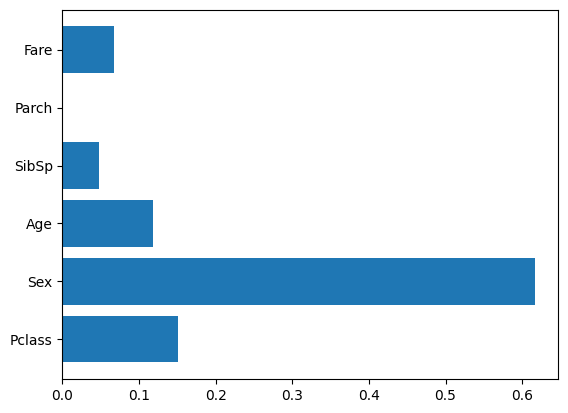

In [ ]:
# Feature importances chart
from matplotlib import pyplot as plt
plt.barh(dtc1.feature_names_in_, dtc3.feature_importances_)

In [ ]:
#@title Comparison of metrics

df_compare = pd.DataFrame([(dtc1_accuracy, dtc2_accuracy, dtc3_accuracy),
                    (dtc1_precision, dtc2_precision, dtc3_precision),
                    (dtc1_recall, dtc2_recall, dtc3_recall),
                    (dtc1_f1, dtc2_f1, dtc3_f1)],
           columns=('DT1 (default params)', 'DT2 (prunned tree)', 'DT3 (tuned params)'),
           index=('Accuracy', 'Precision', 'Recall', 'F1')
                 )

df_compare.head()

,DT1 (default params),DT2 (prunned tree),DT3 (tuned params)
Accuracy,0.776536,0.843575,0.826816
Precision,0.723077,0.815385,0.750000
Recall,0.681159,0.768116,0.826087
F1,0.701493,0.791045,0.786207


In [ ]:
# DT2 performed better than DT1, which means that DT1 is too complex and overfitted.
# DT2 also performed better than DT3, except for Recall. Expanding the hyperparameter space
# in the hyperparameter tuning might help DT3 to perform better.

# All features are significant in the first two models. The most significant features
# are Sex, Age, and Fare. 

# Parch is not significant in the third model. Moreover, Sex is by far the most
# significant feature in the third model. On the other hand, Age and Fare are much less 
# significant than in the first two models, even less than Pclass.